In [12]:
%matplotlib notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import netCDF4 as nc


In [3]:
displays = np.load('../results/palueventsarray.npy')

In [10]:
class paluEventState():
    loc = (0, 120)# center of the simulation area
    rad = (1, 1) # 'radius' half width of the simulation area in each direction
    size=(400, 400)
    
    bath = nc.Dataset('../data/bathymetry.nc','r')
    
    trx = (np.argmin(np.abs(bath.variables['lat'][:]-loc[0]-rad[0])), np.argmin(np.abs(bath.variables['lon'][:]-loc[1]-rad[1])))
    blx = (np.argmin(np.abs(bath.variables['lat'][:]-loc[0]+rad[0])), np.argmin(np.abs(bath.variables['lon'][:]-loc[1]+rad[1])))
    latin = np.linspace(trx[0], blx[0], size[0], dtype=int) # lon 118, 122, lat -2, 2
    lonin = np.linspace(trx[1], blx[1], size[1], dtype=int) # indexes of the bathymetry dataset we need
    lat = bath.variables['lat'][latin]
    lon = bath.variables['lon'][lonin]
    
    h = np.asarray(-bath.variables['elevation'][latin, lonin], dtype=np.float32)[:, ::-1]-15

<IPython.core.display.Javascript object>


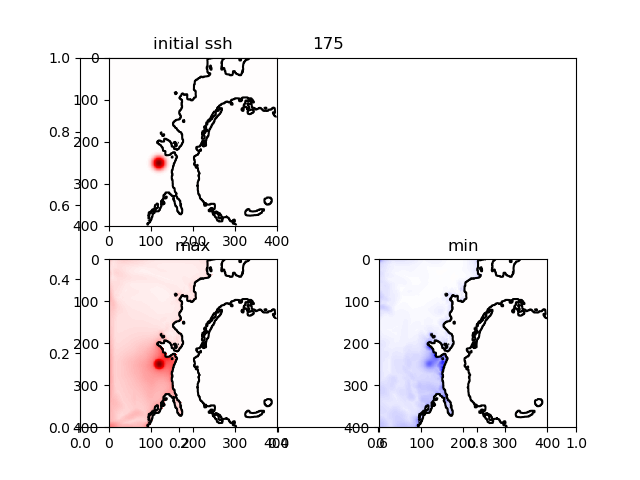

<IPython.core.display.Javascript object>


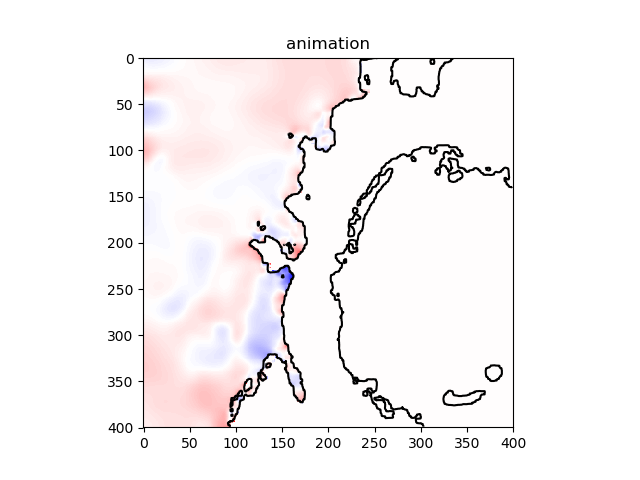

<IPython.core.display.Javascript object>


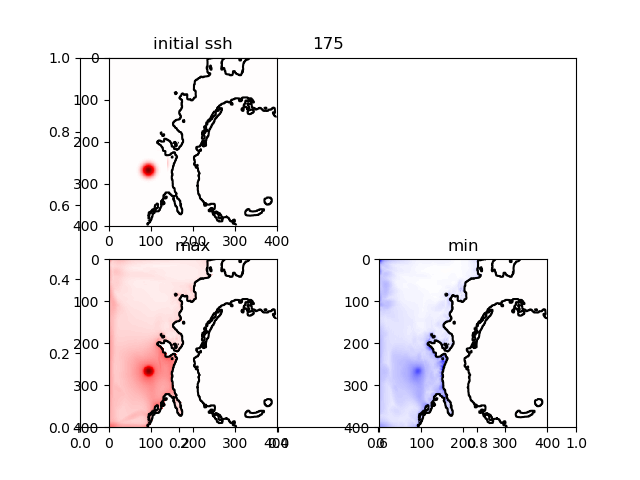

<IPython.core.display.Javascript object>


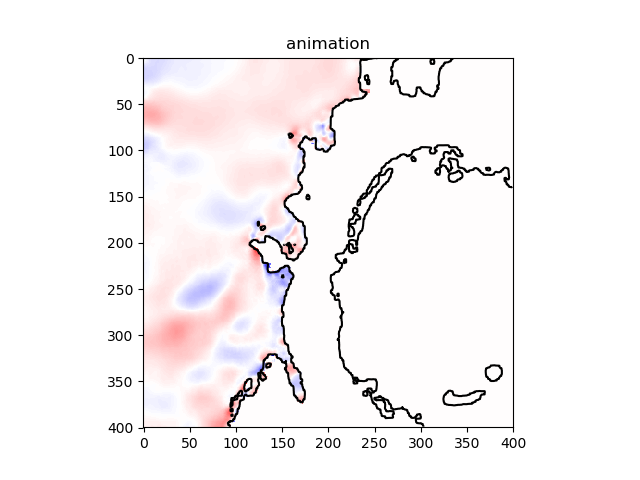

<IPython.core.display.Javascript object>


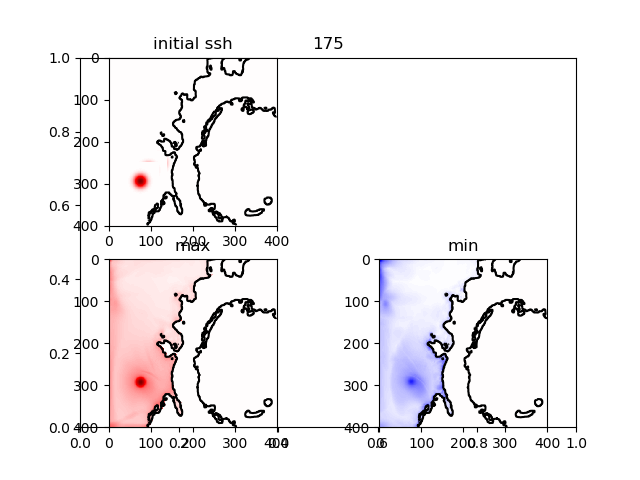

<IPython.core.display.Javascript object>


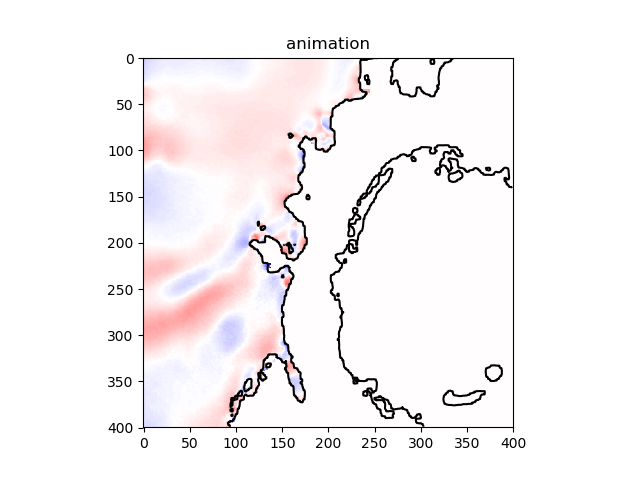

<IPython.core.display.Javascript object>


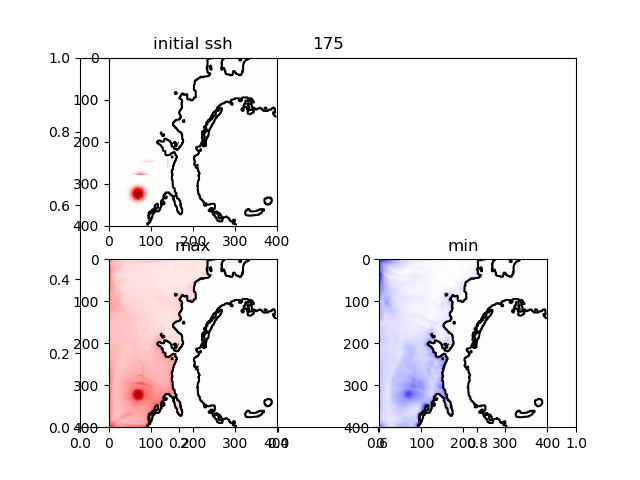

<IPython.core.display.Javascript object>


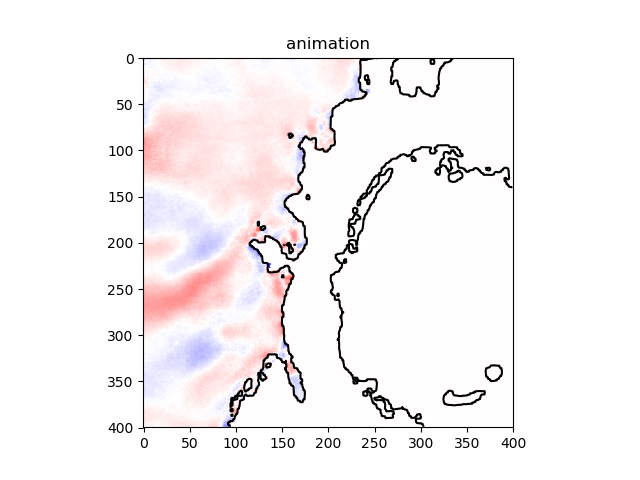

<IPython.core.display.Javascript object>


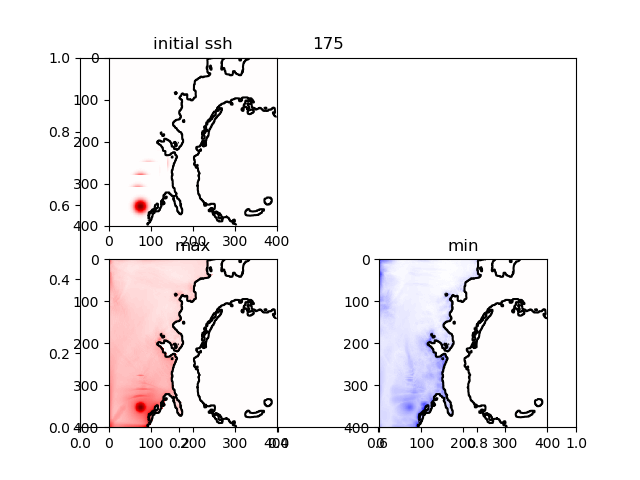

<IPython.core.display.Javascript object>


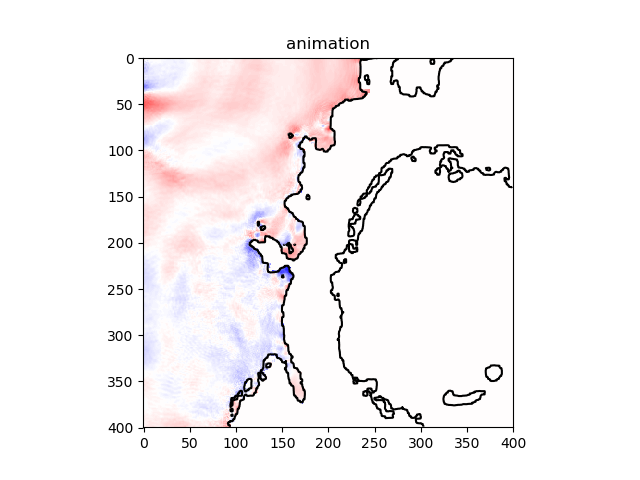

In [13]:
fignum = 175
displaynum = 0
for display in displays[:-1]:
#     print(display.keys())
    fig = plt.figure(fignum + displaynum)
    plt.title(str(fignum))
    
    ax1 = fig.add_subplot(2, 2, 1) # initial SSH
    plt.title('initial ssh')
    initssh = display['initial']
    mmax = np.max(np.abs(initssh))
    plt.imshow(initssh, cmap='seismic', vmin=-mmax, vmax=mmax)
    coast = plt.contour(paluEventState.h-15, levels=1, colors='black')
    
    ax3 = fig.add_subplot(2, 2, 3)
    plt.title('max')
    maxdata = display['max']
    plt.imshow(maxdata, cmap='seismic', vmin=-np.max(maxdata), vmax=np.max(maxdata))
    coast = plt.contour(paluEventState.h-15, levels=1, colors='black')
    
    ax4 = fig.add_subplot(2, 2, 4)
    plt.title('min')
    mindata = display['min']
    plt.imshow(mindata, cmap='seismic', vmin=np.min(mindata), vmax=-np.min(mindata))
    coast = plt.contour(paluEventState.h-15, levels=1, colors='black')
    
#     ax2 = fig.add_subplot(2, 2, 2)
    displaynum += 1
    fig = plt.figure(fignum + displaynum)
    plt.title('animation')
    frames = display['animation']
    mmax = np.max(np.abs(frames))/2
    artis = [(plt.imshow(pframe, cmap='seismic', vmin=-mmax, vmax=mmax),) for pframe in frames]
    anim = animation.ArtistAnimation(fig, artis)
    coast = plt.contour(paluEventState.h-15, levels=1, colors='black')
    anim.save('../results/paluev'+str(displaynum)+'.mp4')
    
    
    
    displaynum += 1